In [30]:
import tensorflow as tf
from tensorflow.keras import layers,models,Sequential
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix,mean_squared_error

In [31]:
data=pd.read_csv("diabetes.csv")

In [32]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
data.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [35]:
X=data.drop(columns="Outcome")
y=data["Outcome"]
X.shape,y.shape

((768, 8), (768,))

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
xtrain.shape,ytrain.shape


((614, 8), (614,))

In [37]:
scaler=StandardScaler()

In [38]:
data[['Glucose','BloodPressure']]=scaler.fit_transform(data[['Glucose',"BloodPressure"]])

In [39]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.848324,0.149641,35,0,33.6,0.627,50,1
1,1,-1.123396,-0.160546,29,0,26.6,0.351,31,0
2,8,1.943724,-0.263941,0,0,23.3,0.672,32,1
3,1,-0.998208,-0.160546,23,94,28.1,0.167,21,0
4,0,0.504055,-1.504687,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,-0.622642,0.356432,48,180,32.9,0.171,63,0
764,2,0.034598,0.046245,27,0,36.8,0.340,27,0
765,5,0.003301,0.149641,23,112,26.2,0.245,30,0
766,1,0.159787,-0.470732,0,0,30.1,0.349,47,1


In [40]:
model=Sequential()

In [41]:
model.add(layers.Dense(64,activation='relu',input_shape=(8,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
# model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
model.fit(xtrain,ytrain,epochs=20,batch_size=32)

Epoch 1/20
20/20 [==============================] - 3s 6ms/step - loss: 0.9593 - accuracy: 0.6075
Epoch 2/20
20/20 [==============================] - 0s 7ms/step - loss: 0.7310 - accuracy: 0.6450
Epoch 3/20
20/20 [==============================] - 0s 7ms/step - loss: 0.6004 - accuracy: 0.6922
Epoch 4/20
20/20 [==============================] - 0s 6ms/step - loss: 0.6808 - accuracy: 0.6596
Epoch 5/20
20/20 [==============================] - 0s 5ms/step - loss: 0.6333 - accuracy: 0.6596
Epoch 6/20
20/20 [==============================] - 0s 7ms/step - loss: 0.6115 - accuracy: 0.7020
Epoch 7/20
20/20 [==============================] - 0s 6ms/step - loss: 0.5816 - accuracy: 0.7085
Epoch 8/20
20/20 [==============================] - 0s 6ms/step - loss: 0.6979 - accuracy: 0.6319
Epoch 9/20
20/20 [==============================] - 0s 6ms/step - loss: 0.6045 - accuracy: 0.6840
Epoch 10/20
20/20 [==============================] - 0s 6ms/step - loss: 0.5839 - accuracy: 0.7052
Epoch 11/20
20/20 [

In [44]:
y_pred=model.predict(xtest)
ypred=np.array(list(map(int,y_pred)))

5/5 [==============================] - 0s 4ms/step


C:\Users\Bharath Reddy\AppData\Local\Temp\ipykernel_13860\2798520832.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ypred=np.array(list(map(int,y_pred)))


In [45]:
cm=confusion_matrix(ypred,ytest)

In [46]:
import seaborn as sns

<Axes: >

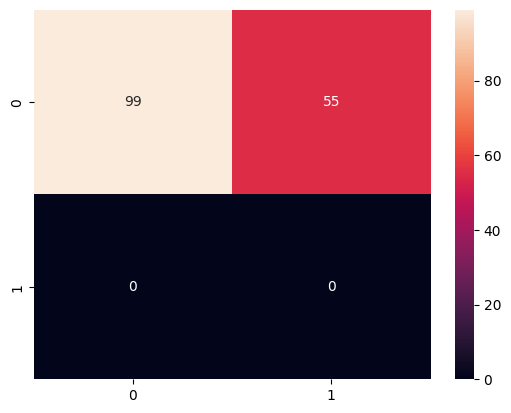

In [47]:
sns.heatmap(cm,annot=True)

In [48]:
mse=mean_squared_error(ytest,y_pred)

In [49]:
print("Mean Squared Error is: ",mse)

Mean Squared Error is:  0.2041173537905091


In [50]:
loss,accuracy=model.evaluate(xtest,ytest)

5/5 [==============================] - 0s 5ms/step - loss: 0.6237 - accuracy: 0.7532


In [51]:
print(f"The loss of the model is:{loss} and the accuracy is:{accuracy}")

The loss of the model is:0.6236549019813538 and the accuracy is:0.7532467246055603


### Another Approach using Sci-Kit Learn

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
lr=LogisticRegression()

In [54]:
lr.fit(xtrain,ytrain)

C:\Users\Bharath Reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
ypreds=lr.predict(xtest)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
acc=accuracy_score(ypreds,ytest)

In [63]:
print(f"The accuracy Using the sklearn modelue is {acc}")

The accuracy Using the sklearn modelue is 0.7467532467532467


In [64]:
cms=confusion_matrix(ypreds,ytest)

<Axes: >

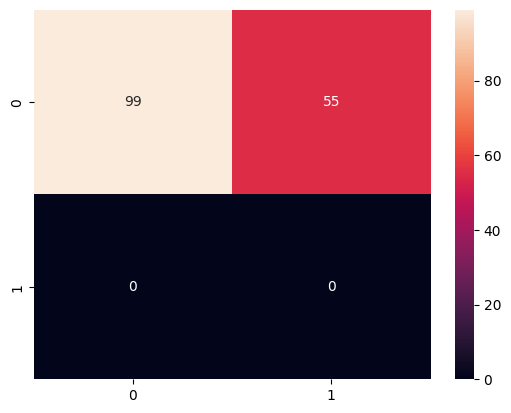

In [68]:
sns.heatmap(cm,annot=True)